# Clasificación de imágenes con redes profundas - Emojis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import keras

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
emojis = np.loadtxt('/content/drive/Shareddrives/Redes neuronales/data/emojis.txt')
X = emojis[:, 1:]
y = emojis[:, 0]

In [ ]:
print(len(X))

2470


In [ ]:
X = X.reshape(2470, 32, 32, 1)
y = to_categorical(y)

In [ ]:
y

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

## Mostrar los primeros 15 emojis

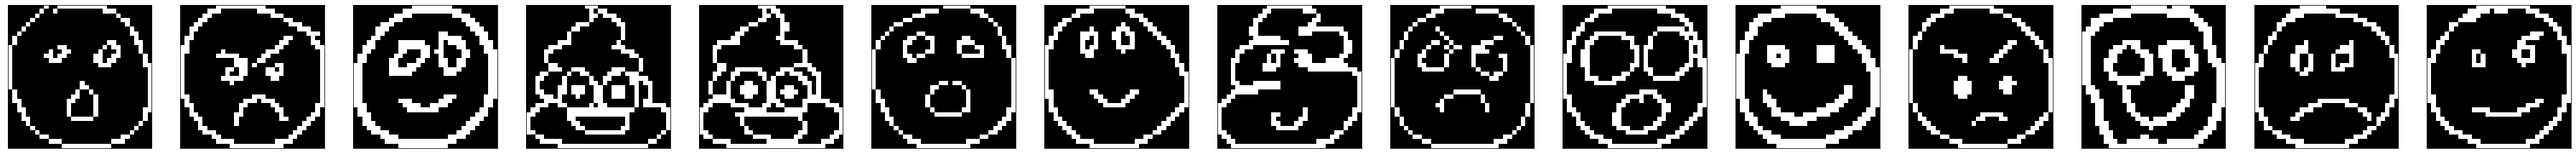

In [ ]:
n = 15
imgs = X.copy()
np.random.shuffle(imgs)
plt.figure(figsize=(64, 64))
for i in range(n):
  # Display image
  ax = plt.subplot(3, n, i+1)
  plt.imshow(imgs[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

## Evaluación de redes neuronales convolucionales

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(256, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(512, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(512, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(512, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(512, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(512, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(512, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(512, kernel_size=3, activation='relu', padding="same"))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

Epoch 1/300
62/62 [==============================] - 12s 43ms/step - loss: 1.6490 - accuracy: 0.2039 - val_loss: 1.6145 - val_accuracy: 0.1862
Epoch 2/300
62/62 [==============================] - 2s 28ms/step - loss: 1.6144 - accuracy: 0.1862 - val_loss: 1.5038 - val_accuracy: 0.1721
Epoch 3/300
62/62 [==============================] - 2s 28ms/step - loss: 1.1205 - accuracy: 0.4013 - val_loss: 0.8166 - val_accuracy: 0.5931
Epoch 4/300
62/62 [==============================] - 2s 28ms/step - loss: 0.6593 - accuracy: 0.6716 - val_loss: 0.4286 - val_accuracy: 0.7814
Epoch 5/300
62/62 [==============================] - 2s 28ms/step - loss: 0.4087 - accuracy: 0.7854 - val_loss: 0.5749 - val_accuracy: 0.7409
Epoch 6/300
62/62 [==============================] - 2s 28ms/step - loss: 0.3598 - accuracy: 0.7890 - val_loss: 0.3509 - val_accuracy: 0.8016
Epoch 7/300
62/62 [==============================] - 2s 28ms/step - loss: 0.3038 - accuracy: 0.8133 - val_loss: 0.3911 - val_accuracy: 0.7733
Epoch

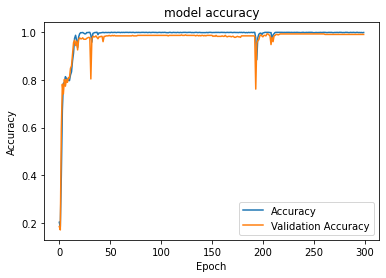

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

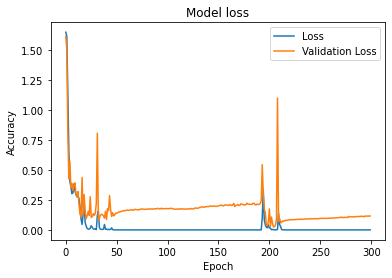

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
